In [1]:
import numpy as np
import pandas as pd
import plotly
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from matplotlib import style
from scipy import stats
from scipy.stats import shapiro
%matplotlib inline
import plotly.express as px

In [2]:
data = pd.read_csv('./CARS.csv')
data.head()

Make           Model   Type Origin DriveTrain     MSRP  Invoice  \
0  Acura             MDX    SUV   Asia        All  $36,945  $33,337   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  $23,820  $21,761   
2  Acura         TSX 4dr  Sedan   Asia      Front  $26,990  $24,647   
3  Acura          TL 4dr  Sedan   Asia      Front  $33,195  $30,299   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  $43,755  $39,014   

   EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0         3.5        6.0         265        17           23    4451   
1         2.0        4.0         200        24           31    2778   
2         2.4        4.0         200        22           29    3230   
3         3.2        6.0         270        20           28    3575   
4         3.5        6.0         225        18           24    3880   

   Wheelbase  Length  
0        106     189  
1        101     172  
2        105     183  
3        108     186  
4        115     197

In [3]:
data.describe()

EngineSize   Cylinders  Horsepower    MPG_City  MPG_Highway  \
count  428.000000  426.000000  428.000000  428.000000   428.000000   
mean     3.196729    5.807512  215.885514   20.060748    26.843458   
std      1.108595    1.558443   71.836032    5.238218     5.741201   
min      1.300000    3.000000   73.000000   10.000000    12.000000   
25%      2.375000    4.000000  165.000000   17.000000    24.000000   
50%      3.000000    6.000000  210.000000   19.000000    26.000000   
75%      3.900000    6.000000  255.000000   21.250000    29.000000   
max      8.300000   12.000000  500.000000   60.000000    66.000000   

            Weight   Wheelbase      Length  
count   428.000000  428.000000  428.000000  
mean   3577.953271  108.154206  186.362150  
std     758.983215    8.311813   14.357991  
min    1850.000000   89.000000  143.000000  
25%    3104.000000  103.000000  178.000000  
50%    3474.500000  107.000000  187.000000  
75%    3977.750000  112.000000  194.000000  
max    7190.000000  144.000000  238.000000

# 2.1.1.Para las variables categóricas un gráfico de barras. Categoría numero de observaciones.
# Para las variables numéricas crear histogramas. Listar los modelos de carros que están más lejos de 4 estándares de desviación, y serían considerados outliers. Hacer test de si es una distribución normal o no.

In [4]:
data.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP            object
Invoice         object
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

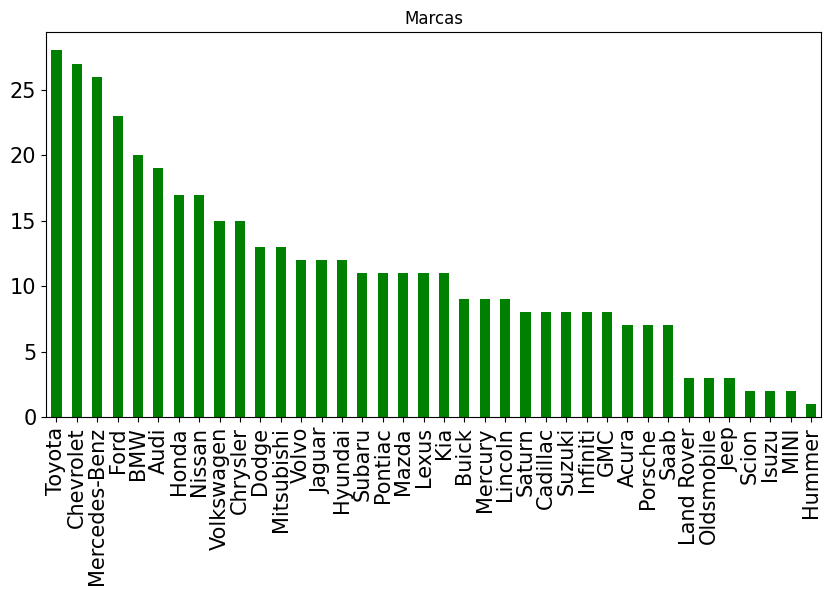

In [5]:
new_data= data['Make'].value_counts().plot(kind="bar", fontsize = 15, color=['green'], figsize=(10,5),title='Marcas')

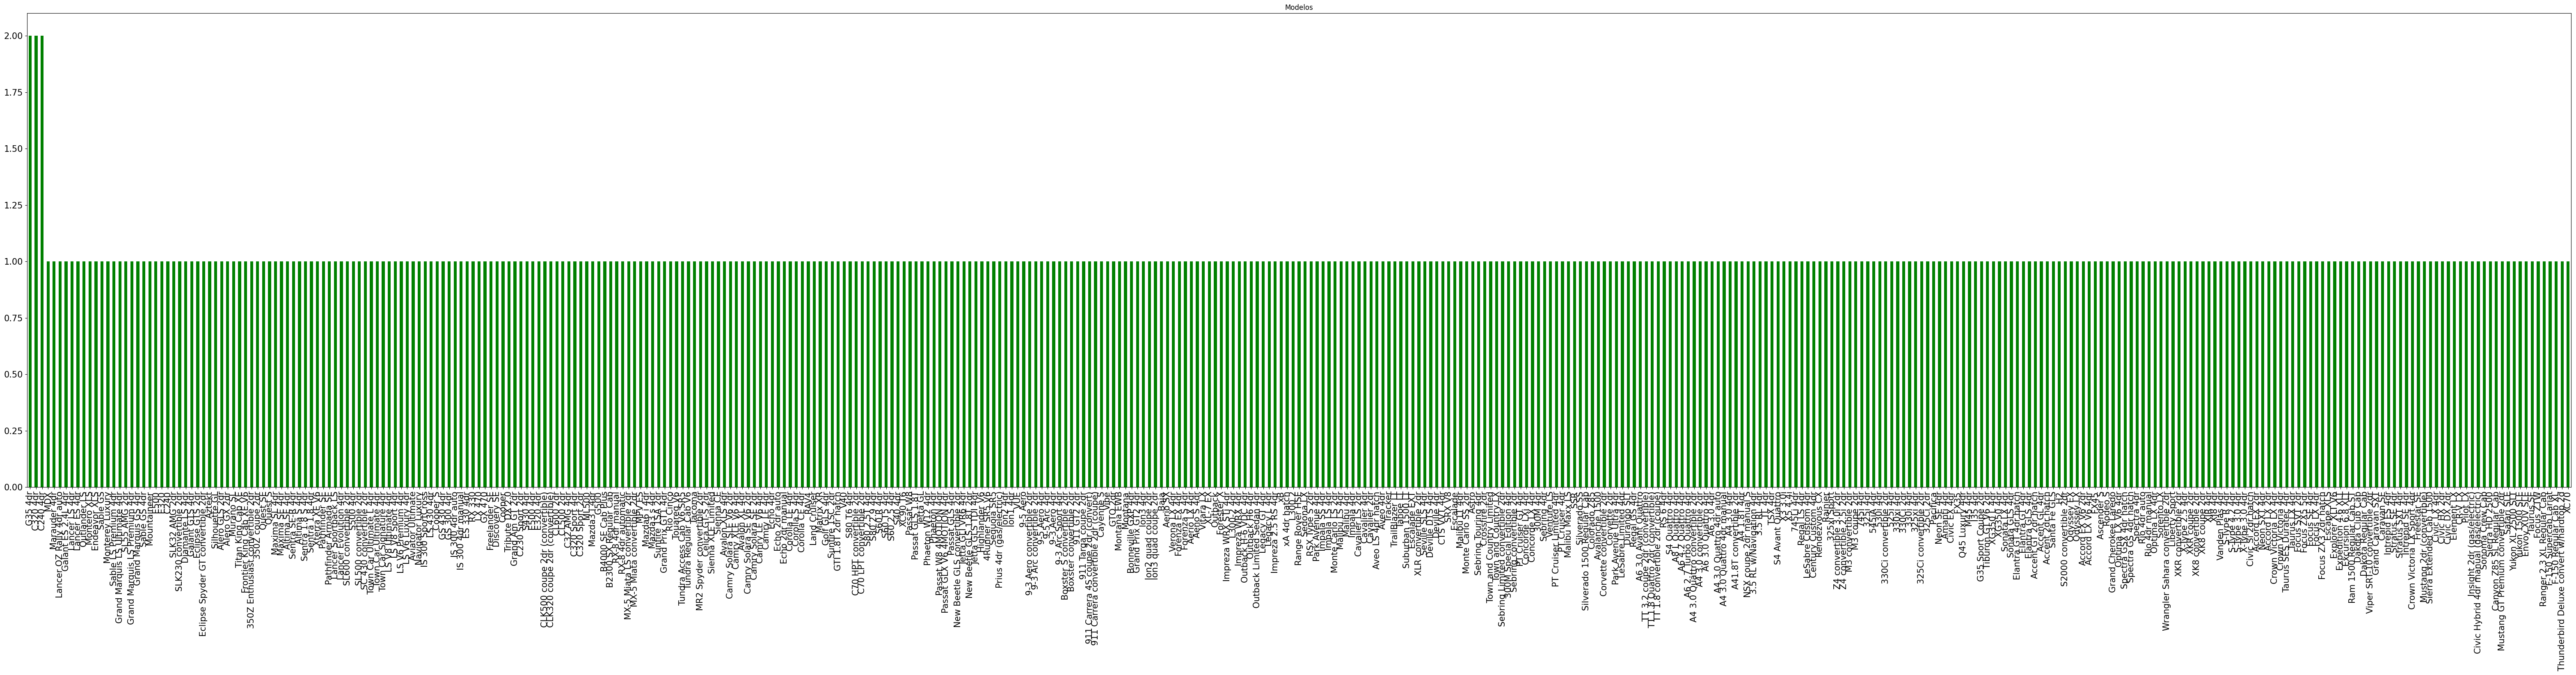

In [6]:
new_data= data['Model'].value_counts().plot(kind="bar", fontsize = 15, color=['green'], figsize=(80,15),title='Modelos')

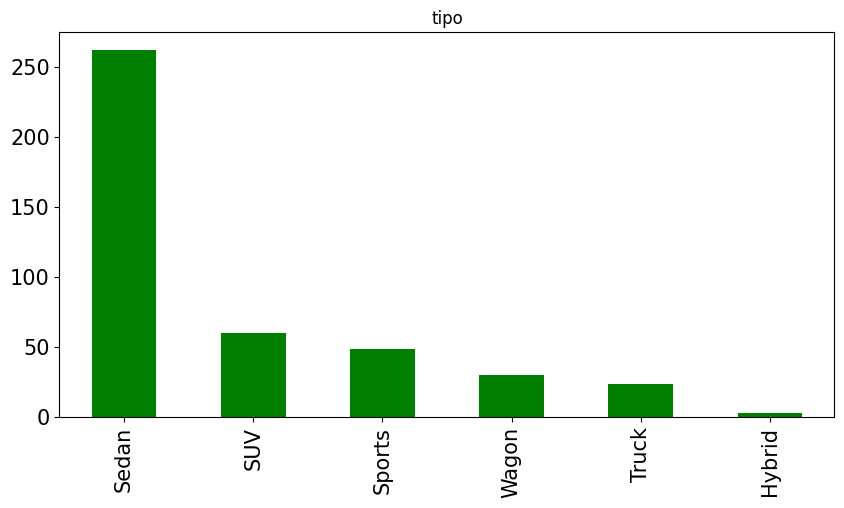

In [7]:
new_data= data['Type'].value_counts().plot(kind="bar", fontsize = 15, color=['green'], figsize=(10,5),title='tipo')

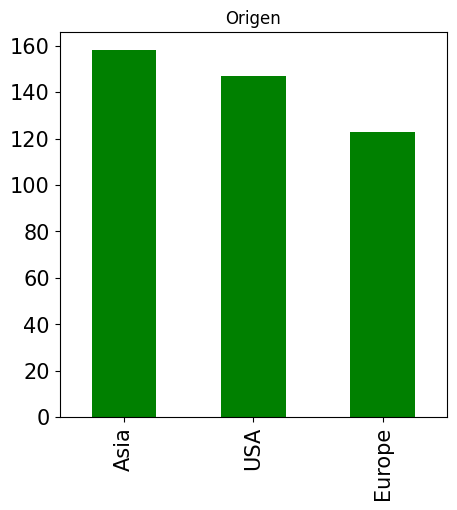

In [8]:
new_data= data['Origin'].value_counts().plot(kind="bar", fontsize = 15, color=['green'], figsize=(5,5),title='Origen')

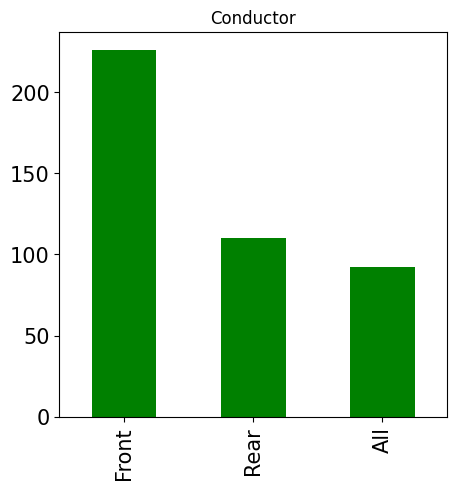

In [9]:
new_data= data['DriveTrain'].value_counts().plot(kind="bar", fontsize = 15, color=['green'], figsize=(5,5),title='Conductor')

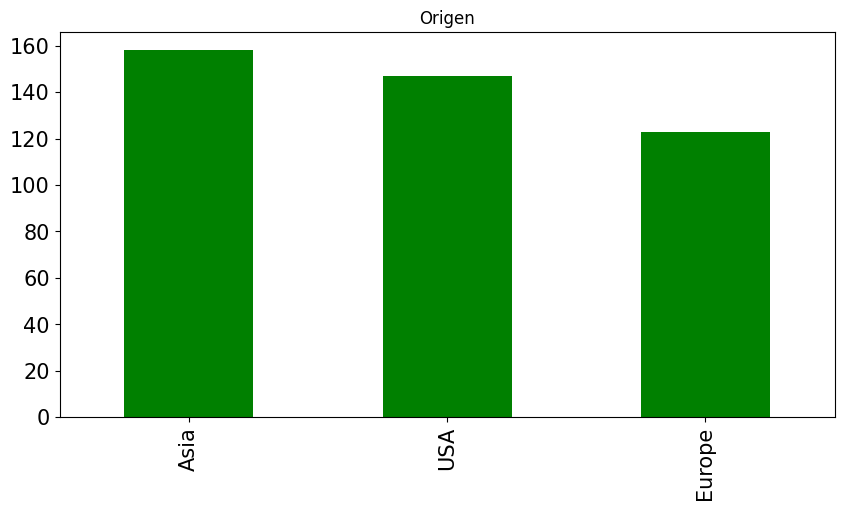

In [10]:
new_data= data['Origin'].value_counts().plot(kind="bar", fontsize = 15, color=['green'], figsize=(10,5),title='Origen')

In [11]:
data["Invoice"] = data["Invoice"].replace('[\$,]', '', regex=True).astype(float)
col = ['Invoice',"EngineSize"	,"Cylinders",	"Horsepower",	"MPG_City",	"MPG_Highway",	"Weight",	"Wheelbase",	"Length"]
df_stand = (data[col] - data[col].mean())/data[col].std()
df_stand

Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  \
0    0.188316    0.273563   0.123513    0.683703 -0.584311    -0.669452   
1   -0.467841   -1.079501  -1.159819   -0.221136  0.752022     0.723985   
2   -0.304255   -0.718684  -1.159819   -0.221136  0.370212     0.375626   
3    0.016115    0.002951   0.123513    0.753306 -0.011597     0.201446   
4    0.510103    0.273563   0.123513    0.126879 -0.393406    -0.495272   
..        ...         ...        ...         ...       ...          ...   
423  0.464134   -0.718684  -0.518153   -0.262898  0.179308     0.201446   
424  0.570697   -0.808888  -0.518153    0.363529 -0.011597    -0.146913   
425  0.711836   -0.267662   0.123513    0.725464 -0.202502    -0.146913   
426 -0.304595   -1.169705  -1.159819   -0.638753  0.370212     0.375626   
427  0.175563   -0.628479  -0.518153   -0.109771 -0.011597     0.027266   

       Weight  Wheelbase    Length  
0    1.150285  -0.259174  0.183720  
1   -1.053980  -0.860727 -1.000290  
2   -0.458447  -0.379485 -0.234166  
3   -0.003891  -0.018553 -0.025223  
4    0.397962   0.823622  0.740901  
..        ...        ...       ...  
423 -0.168585  -0.379485 -0.025223  
424 -0.168585  -0.379485 -0.025223  
425  0.098878   0.222069  0.253368  
426 -0.996008  -0.860727 -0.443109  
427  0.322862   0.101758 -0.025223  

[428 rows x 9 columns]

In [12]:
data_sinoutliers = df_stand.query(
                "(Invoice < 4.0 or Invoice >-4.0)"
                "or (EngineSize < 4.0 or EngineSize >-4.0)"
                "or (Cylinders < 4.0 or Cylinders >-4.0)"
                " or (Horsepower < 4.0 or Horsepower >-4.0)"
                "or (MPG_City < 4.0 or MPG_City >-4.0)"
                "or (MPG_Highway < 4.0 or MPG_Highway >-4.0)"
                "or (Weight < 4.0 or Weight >-4.0)"
                "or (Wheelbase < 4.0 or Wheelbase >-4.0)"
                "or (Length < 4.0 or Length >-4.0)")
data_sinoutliers

Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  \
0    0.188316    0.273563   0.123513    0.683703 -0.584311    -0.669452   
1   -0.467841   -1.079501  -1.159819   -0.221136  0.752022     0.723985   
2   -0.304255   -0.718684  -1.159819   -0.221136  0.370212     0.375626   
3    0.016115    0.002951   0.123513    0.753306 -0.011597     0.201446   
4    0.510103    0.273563   0.123513    0.126879 -0.393406    -0.495272   
..        ...         ...        ...         ...       ...          ...   
423  0.464134   -0.718684  -0.518153   -0.262898  0.179308     0.201446   
424  0.570697   -0.808888  -0.518153    0.363529 -0.011597    -0.146913   
425  0.711836   -0.267662   0.123513    0.725464 -0.202502    -0.146913   
426 -0.304595   -1.169705  -1.159819   -0.638753  0.370212     0.375626   
427  0.175563   -0.628479  -0.518153   -0.109771 -0.011597     0.027266   

       Weight  Wheelbase    Length  
0    1.150285  -0.259174  0.183720  
1   -1.053980  -0.860727 -1.000290  
2   -0.458447  -0.379485 -0.234166  
3   -0.003891  -0.018553 -0.025223  
4    0.397962   0.823622  0.740901  
..        ...        ...       ...  
423 -0.168585  -0.379485 -0.025223  
424 -0.168585  -0.379485 -0.025223  
425  0.098878   0.222069  0.253368  
426 -0.996008  -0.860727 -0.443109  
427  0.322862   0.101758 -0.025223  

[428 rows x 9 columns]

(array([ 49., 110., 102.,  71.,  65.,  15.,  14.,   1.,   0.,   1.]),
 array([1.3, 2. , 2.7, 3.4, 4.1, 4.8, 5.5, 6.2, 6.9, 7.6, 8.3]),
 <BarContainer object of 10 artists>)

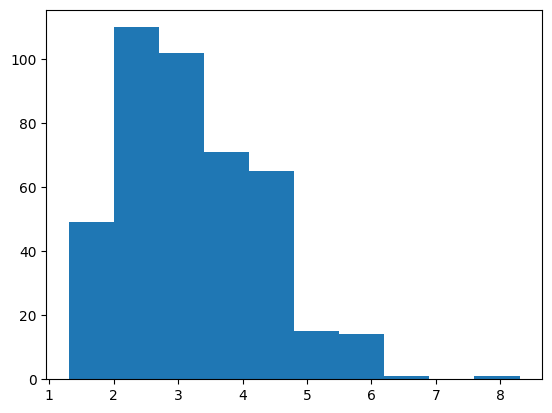

In [13]:
plt.hist(data[["EngineSize"]])

(array([  3.,  17.,  35., 100., 120.,  78.,  51.,  13.,   9.,   2.]),
 array([143. , 152.5, 162. , 171.5, 181. , 190.5, 200. , 209.5, 219. ,
        228.5, 238. ]),
 <BarContainer object of 10 artists>)

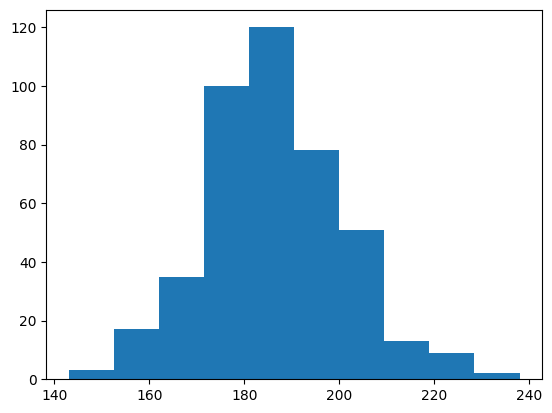

In [14]:
plt.hist(data["Length"])

(array([  1., 136.,   7., 190.,   0.,  87.,   0.,   2.,   0.,   3.]),
 array([ 3. ,  3.9,  4.8,  5.7,  6.6,  7.5,  8.4,  9.3, 10.2, 11.1, 12. ]),
 <BarContainer object of 10 artists>)

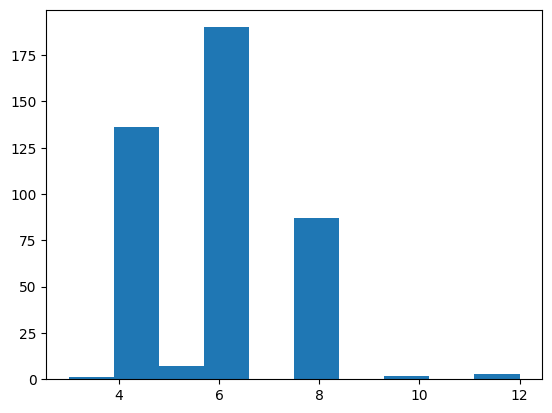

In [15]:
plt.hist(data["Cylinders"])

(array([ 31., 195., 142.,  44.,   9.,   4.,   0.,   1.,   0.,   2.]),
 array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.]),
 <BarContainer object of 10 artists>)

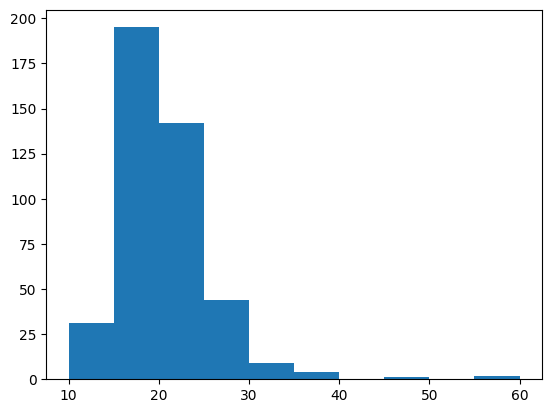

In [16]:
plt.hist(data["MPG_City"])

(array([ 14.,  69., 205.,  97.,  32.,   7.,   1.,   2.,   0.,   1.]),
 array([12. , 17.4, 22.8, 28.2, 33.6, 39. , 44.4, 49.8, 55.2, 60.6, 66. ]),
 <BarContainer object of 10 artists>)

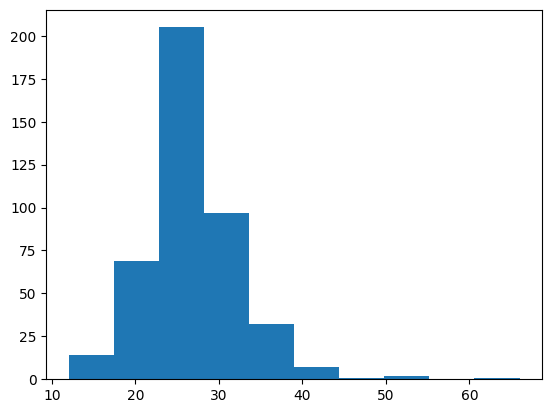

In [17]:
plt.hist(data["MPG_Highway"])

(array([ 11.,  67., 123., 122.,  62.,  25.,  11.,   4.,   2.,   1.]),
 array([1850., 2384., 2918., 3452., 3986., 4520., 5054., 5588., 6122.,
        6656., 7190.]),
 <BarContainer object of 10 artists>)

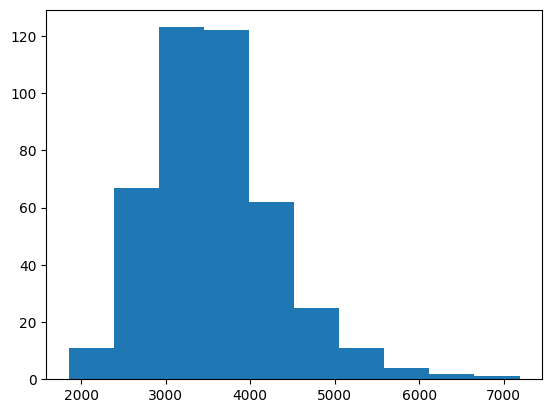

In [18]:
plt.hist(data["Weight"])

(array([ 24.,  68., 110., 108.,  42.,  50.,  15.,   4.,   2.,   5.]),
 array([ 73. , 115.7, 158.4, 201.1, 243.8, 286.5, 329.2, 371.9, 414.6,
        457.3, 500. ]),
 <BarContainer object of 10 artists>)

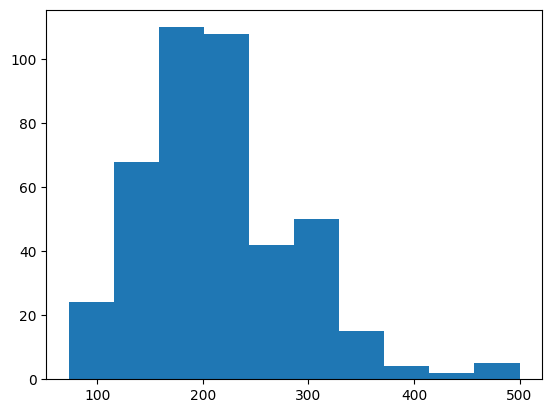

In [19]:
plt.hist(data["Horsepower"])

(array([ 11.,  41., 114., 118.,  92.,  26.,  11.,   9.,   3.,   3.]),
 array([ 89. ,  94.5, 100. , 105.5, 111. , 116.5, 122. , 127.5, 133. ,
        138.5, 144. ]),
 <BarContainer object of 10 artists>)

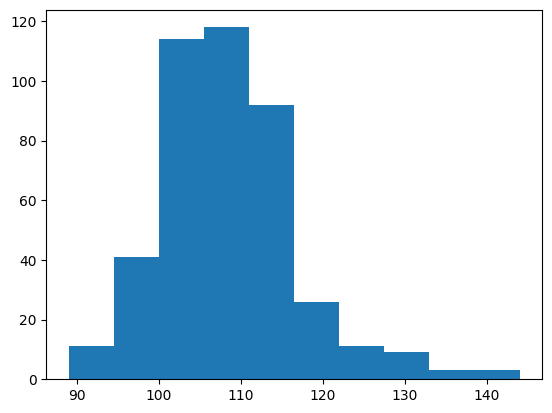

In [20]:
plt.hist(data["Wheelbase"])

(array([224., 142.,  34.,  18.,   6.,   0.,   3.,   0.,   0.,   1.]),
 array([  9875. ,  26243.5,  42612. ,  58980.5,  75349. ,  91717.5,
        108086. , 124454.5, 140823. , 157191.5, 173560. ]),
 <BarContainer object of 10 artists>)

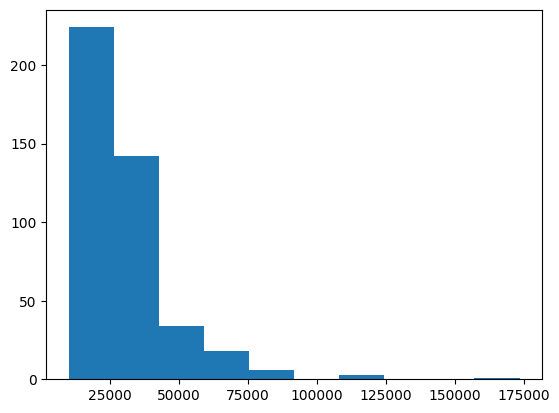

In [21]:
plt.hist(data["Invoice"])

# Test de shapiro para saber si la distribucion es normal o no.
# Con los outliers:

In [22]:
k1,p = stats.shapiro(data[col])
alpha = 1e-3
print("It is not normal " if p < alpha else "It is normal ")

It is normal 


# Sin los outliers:

In [23]:
k1,p = stats.shapiro(data_sinoutliers)
alpha = 1e-3
print("It is not normal " if p < alpha else "It is normal ")

It is normal 


# 2.2.1. Variables categóricas crear un boxplot. Explique cómo interpreta el gráfico

In [24]:
fig = px.box(data,x= "Make",y = "MPG_City")
fig.show()

Aqui podemos ver la cantidad de millas que recorren por galon de acuerdo a la marca, podemos notar que marcas como Toyota, o Honda sus modelos no siguen una tendencia a recorrer las mismas milas por galon camparados con otros cuyo diagrama es muy pequeño, sus modelos tienden a recorrer casi las mismas millas por galón.

In [25]:
fig = px.box(data,x= "Type",y = "MPG_City")
fig.show()

En este diagrama podemos visualizar las millas por galon que recorren por tipo de vehiculo, en la que podemos notar que la gran mayoria de tipos suelen llevar las mismas tendencias, excepto por lo hibridos que ellos tienden a recorrer muchas más millas por galon.

In [26]:
fig = px.box(data,x= "Origin",y = "MPG_City")
fig.show()

En este diagrama podemos observar la cantidad de millas por galon que recorren los vehiculos acorde a su origen, en el cual podemos notar que los europeos tienden a recorrer las mismas millas por galon a comparacion de los demas, los de asia tienden a recorrer más millas por galon que los europeos o los de estados unidos.

In [27]:
fig = px.box(data,x = "DriveTrain", y = "MPG_City")
fig.show()

En este diagrama podemos visualizar las millas por galon que recorren los vehiculos acorde al tipo de traccion, en el cual podemos notar que los de traccion frontal tienden a recorrer más millas por galon que los demas.

In [28]:
fig = px.scatter_matrix(data[["MPG_City","Invoice"]])
fig.show()

Aqui podemos notar que la relación de las millas que recorre por galon y el precio tienen una relacion inversa, a menor precio, más millas por galon recorren

In [29]:
fig = px.scatter_matrix(data[["MPG_City","EngineSize"]])
fig.show()

En esta grafica podemos notar que la relacion entre el tamaño del motor y la cantidad de millas que recorre por galon es inversamente proporcional, mientras mayor sea el tamaño del motor menos millas recorre por galon.

In [30]:
fig = px.scatter_matrix(data[["MPG_City","Cylinders"]])
fig.show()

El cilindraje es inversamnente proporcional a las millas que recorre por galon, en algunos podemos notar que ciertos vehiculos con el mismo cilindrje recorren aún más millas por galon

In [31]:
fig = px.scatter_matrix(data[["MPG_City","Horsepower"]])
fig.show()

Aunque parece una relacion inversa entre los caballos de fuerza y las millas que recorre por galon, se puede tambien notar que los caballos de fuerza no son muy determinantes acorde a las millas que recorren por galon

In [32]:
fig = px.scatter_matrix(data[["MPG_City","MPG_Highway"]])
fig.show()

La relacion entre el tipo de suelo y las millas que se recorre por galon es casi la misma, por ende no se pueden sacar mayores conclusiones, pero, parece una relacion directamente proporcional

In [33]:
fig = px.scatter_matrix(data[["MPG_City","Weight"]])
fig.show()

La cantidad de millas por galon y el peso son inversas, a mayor peso, menos millas por galon recorre

In [34]:
fig = px.scatter_matrix(data[["MPG_City","Wheelbase"]])
fig.show()

La distancia entre ejes y las millas por galon tienen una relacion medianamente estrecha, podemos notar que algunos tinen la misma diatancia entre ejes y recorren más galones

In [35]:
fig = px.scatter_matrix(data[["MPG_City","Length"]])
fig.show()

Los autos más pequeños tienden a recorrer mayores millas por galon

# Cree la matriz de correlación, cuales son las variables más importantes para explicar la variabilidad de MPG_City. Explique por qué el coeficiente es negativo o positivo.

In [36]:
corr = data.corr ()
corr.style.background_gradient (cmap = 'coolwarm')

C:\Users\sebas\AppData\Local\Temp\ipykernel_7496\3978492336.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



1. Las variables que son mas directamente proporcionales son las millas por galon y el suelo, tambien entre la distancia entre ejes y el tamaño, tambien la relacion entre el tamaño del motor y el peso, el precio y los caballos de fuerza, y el cilindraje con los caballos de fuerza
2. Los que son más inversamente proporcionales son: las millas por galón y el peso, el peso y el suelo, el tamaño del motor y las millas por galon

In [37]:
corr = data_sinoutliers.corr ()
corr.style.background_gradient (cmap = 'coolwarm')

Se puede concluir a traves de los datos que los outliers no representan gran diferencia en la correlacion.